# OFDM Refrence Notebook

This notebook walks through ofdm modulation, and covers the following topics:

1. Fourier Transform of Sinusoids (Real and Complex)
2. Fourier Transform of Rectangualar Functions
3. Definition of Orthogonal Signals
4. Structure of an OFDM signal
5. OFDM Transmitter Simulation
6. Raleigh Fading Channel
7. OFDM receiver Simulation

The goal is to make a refrence notebook I can look back on to refresh myself on OFDM modultaion. 

# Fourier Transform of Complex Sinusoids

The [fourier transfrom](https://ocw.mit.edu/courses/6-003-signals-and-systems-fall-2011/d74bab2dfa6e465d61fed45763d50528_MIT6_003F11_lec16.pdf) of a signal $x\left( t \right)$ is:
$$
F \left( j\omega \right) = 
    \int_{-\infty}^{\infty} f \left( t \right) 
    e ^{ -j \omega t}
$$

and the inverse fourier transfrom is:

$$
x \left( t \right) = 
    \frac{1}{2\pi} \int_{-\infty}^{\infty} F\left(j\omega \right)
    e^{j \omega t}
$$

where:

- $\omega = 2\pi f$
- $e ^{\left( -j \omega t\right)} = \cos \left( \omega t\right) - j\sin\left(\omega t\right)$


Rather then directly solving for the fourier transfrom of a complex sinusoid it is much easier to solve this going backwards. The goal then becomes finding the frequency domain signal with an inverse fourier transfrom results in a sinusoidal time domain signal. This is a bit of a shortcut/trick that is commonly used to quickly "prove" the fourier transfrom of a complex sinusoid.

Consider the frequency domain direc-delta function $F\left(j\omega\right) = \delta \left(\omega - \omega_0\right)$. Solving for its inverse fourier transfrom:

$$
x \left( t \right) = 
    \frac{1}{2\pi} \int_{-\infty}^{\infty} \delta \left(\omega - \omega_0\right)
    e^{j \omega t}
$$

by applying the [sifting property](https://en.wikipedia.org/wiki/Dirac_delta_function#Translation) of the unit impulse funtion:

$$
x \left( t \right) =
\mathscr{F}^{-1} \left(\delta \left(\omega - \omega_0\right)\right) =
    \frac{1}{2\pi} e ^ {j \omega_0 t}
$$

which shows that:

$$
e ^ {j \omega_0 t} = 
2 \pi \mathscr{F}^{-1} \left(\delta \left(\omega - \omega_0\right)\right)
$$

Finally taking this realtionship shows that the fourier transform of a complex sinusoid:

$$
\mathscr{F} \left(e ^ {j \omega_0 t}\right) = 
2 \pi \mathscr{F} \left[
\mathscr{F}^{-1} \left(\delta \left(\omega - \omega_0\right)\right)\right]
$$

$$
\boxed{
\mathscr{F} \left(e ^ {j \omega_0 t}\right) = 
2 \pi \delta \left(\omega - \omega_0\right)
}
$$

## Fourier Tranform of cos and sin

Knowing the fourier transfrom of a complex sinusoid makes it much easier to solve for the fourier transfroms of regular sine and cosins functions. 

For cosine using [Eulers Formula](https://en.wikipedia.org/wiki/Euler%27s_formula) $\cos\left(\omega_0 t\right)$ becomes:

$$
\cos(\omega t) = 
    \frac{1}{2} e^{j\omega_0 t} + \frac{1}{2}e^{-j\omega_0 t}
$$

applying the fourier tranform now results in:

$$
\boxed{
\mathscr{F} \left(\cos(\omega t)\right) = 
    \frac{1}{2} \delta(\omega-\omega_0) + \frac{1}{2} \delta(\omega+\omega_0)}
$$

Similaryly $sin(\omega t)$ becomes:

$$
\cos(\omega t) = 
    \frac{1}{2} e^{j\omega_0 t} - \frac{1}{2}e^{-j\omega_0 t}
$$

so that:

$$
\boxed{
\mathscr{F} \left(\sin(\omega t)\right) = 
    \frac{1}{2} \delta(\omega-\omega_0) - \frac{1}{2} \delta(\omega+\omega_0)}
$$


## Simulation of FFT of Complex Sinusoid Signal

The simualtion below confirms the results calculated above. 

One difference is the amplitude of the delta for a discrete signal becomes the length of the sample domain signal. 

Another important differnce to note is that for a discrete signal ther is no such thing as a infinte signal. Instead there is a rectangular window being multiplied with the complex exponential. In the frequency domain this correlates to the shifted delta function being *correlated* the fourier tranform of the rectangular function. You can see the resulting sinc envolope in the plot below. 

In [166]:
import numpy as np
import matplotlib.pyplot as plt

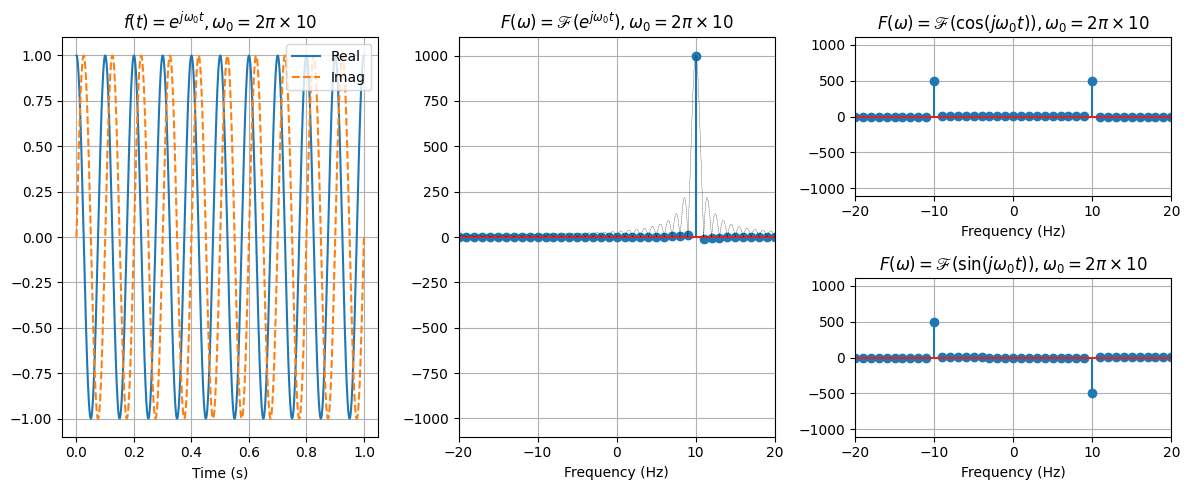

In [167]:
fs = 1000
T = 1
t = 1/fs*np.arange(0, T*fs+1)
f_0 = 10

x_t = np.exp(2j*np.pi*f_0*t)

fft_len = x_t.size
x_f = np.fft.fftshift(np.fft.fft(x_t))
x_cos_f = np.fft.fftshift(np.fft.fft(np.real(x_t)))
x_sin_f = np.fft.fftshift(np.fft.fft(np.imag(x_t)))
f = fs*np.linspace(-0.5, 0.5, fft_len)

fft_len = x_t.size*100
x_f2 = np.fft.fftshift(np.fft.fft(x_t, fft_len))
f2 = fs*np.linspace(-0.5, 0.5, fft_len)

plt.figure(1, figsize=(12,5))
plt.subplot(131)
plt.plot(t, np.real(x_t), label='Real')
plt.plot(t, np.imag(x_t), '--', label='Imag')
plt.grid()
plt.legend(loc='upper right')
plt.title(r'$f(t) = e^{j\omega_0 t}, \omega_0 = 2\pi \times$' + f'{f_0}')
plt.xlabel('Time (s)')
plt.subplot(132)
plt.stem(f, np.real(x_f))
plt.plot(f2, np.abs(x_f2), 'k--', linewidth=0.25)
plt.ylim(-x_f.size-100, x_f.size+100)
plt.grid()
plt.xlim(-2*f_0, 2*f_0)
plt.title(r'$F(\omega) = \mathscr{F} \left(e^{j\omega_0 t}\right), \omega_0 = 2\pi \times$' + f'{f_0}')
plt.xlabel('Frequency (Hz)')
plt.subplot(233)
plt.stem(f, np.real(x_cos_f))
plt.title(r'$F(\omega) = \mathscr{F} \left( \cos(j\omega_0 t) \right), \omega_0 = 2\pi \times$' + f'{f_0}')
plt.xlim(-2*f_0, 2*f_0)
plt.ylim(-x_f.size-100, x_f.size+100)
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.subplot(236)
plt.stem(f, np.imag(x_sin_f))
plt.xlim(-2*f_0, 2*f_0)
plt.ylim(-x_f.size-100, x_f.size+100)
plt.grid()
plt.title(r'$F(\omega) = \mathscr{F} \left( \sin(j\omega_0 t) \right), \omega_0 = 2\pi \times$' + f'{f_0}')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

# Fourier Transform of Rectangular Pulse

As explored in the previous section, the fourier transform of an infinite continuous-time waveform is a set of unit impulse funcitons.

In a practical system there is no such thing as an infinte signal. Then you can think of any practical signal as having a set duration. One common way to think of this is to muliply your desired infinite signal with another signal that has a fixed duration. The simplest fucntion that comes to mind is a rectangular pulse. 

The rectangular pulse is defined as:

$$
r(t) = 1 \ 0 < t < T
$$

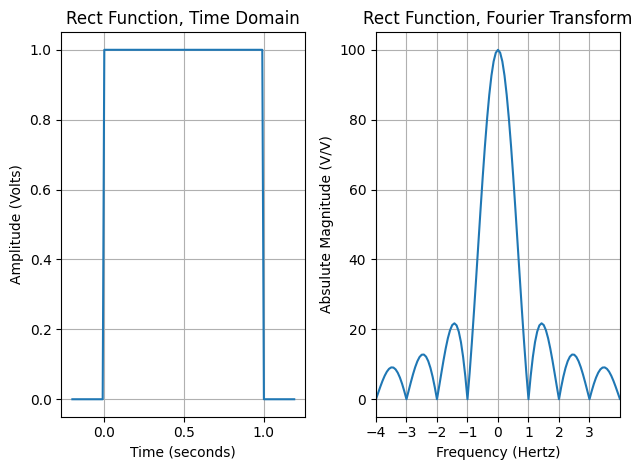

In [169]:
rect_width = 1# second
fs = 100#hs
n_samps = rect_width*fs
pad_samps = 20
t = 1/fs * np.arange(0, n_samps+2*pad_samps) - 1/fs*pad_samps

x_t = np.hstack((np.zeros(pad_samps), np.ones(n_samps), np.zeros(pad_samps)))
f, x_f = my_fft(x_t, fs, x_t.size*10)

plt.subplot(121)
plt.plot(t, x_t)
plt.grid()
plt.title('Rect Function, Time Domain')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (Volts)')
plt.subplot(122)
plt.plot(f, np.abs(x_f))
xmax = int(4*rect_width)
xmin = int(-1*xmax)
plt.xlim(xmin, xmax)
plt.xticks(np.arange(xmin, xmax))
plt.grid()
plt.title('Rect Function, Fourier Transform')
plt.xlabel('Frequency (Hertz)')
plt.ylabel('Absulute Magnitude (V/V)')
plt.tight_layout()

# OFDM Transmit Steps

To transmit a single OFDM frame consider creating an array of *frequency symbol* data $X[k]$.

To modulate this into an OFDM waveform $\left(x[n] \right)$ take the inverse discrete fourier transform (IDFT) of the array.

But why does this work? lets look in some more detail.

## IDFT Equation

The IDFT equation is shown below:

$$
x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k \exp \left(+j2\pi \frac{kn}{N}\right)
$$

for a 4 point IDFT you see:

$$
N x_n = X_0 
      + X_1 \exp \left(+j2\pi \frac{1n}{N}\right)      
      + X_2 \exp \left(+j2\pi \frac{2n}{N}\right)
      + X_3 \exp \left(+j2\pi \frac{3n}{N}\right)
$$

This shows that each of the 4 frequency symbols is mapped to a complex sinusoid with a different frequency. Furthurmore it can be shown that 